# Linear Regression

## Motivating Linear Approximations

Linear models are extremely useful becase they can be used to approximate complex relationships with easy and interpretable models. When employing linear models to learn a function $f$ relating $Y$ to $X$, we do not need to necessarily assume that the relationship between $X$ and $Y$ is linear. We are just looking for the best linear approximation to the true relationship, whatever that might be. Taylor's theorem gives reasons to believe that a linear model is a sensible approximation even for more complex functions, at least locally. Indeed, if the true regression function $f(x)$ is a smooth function, given a specific value $x_0$, we can expand the function as

\begin{equation}
    f(x) = f(x_0) + \frac{f'(x_0)}{1!}(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + \cdots
\end{equation}

This expansion breaks down the function into an infinite sum of terms based on the function's derivatives at $x_0$. The approximation starts with the function's value at $x_0$, then adds adjustments based on how the function changes (its derivatives) as you move away from $x_0$. For $x$ close enough to $x_0$, we can get away with truncating the series at first order, as in

\begin{equation}
    f(x) \approx f(x_0) + f'(x_0)(x-x_0)
\end{equation}

When you truncate the Taylor series after the first derivative term, we are essentially creating a linear model. This model approximates the function $f(x)$ using a straight line that tangentially matches the function's slope at $x_0$. This approach is valid as long as the higher-order terms (like the quadratic term and beyond) are negligible, which usually means $x$ is close enough to $x_0$. Thus, while a  linear approximation may work well locally (near $x_0$), extending this approximation globally (over a wide range of $x$ values) may not always be accurate unless the function is nearly linear over that range. The key to a successful linear approximation lies in determining how "close" $x$ must be to $x_0$ for the higher-order terms to be negligible. For a linear approximation to be valid, we want the influence of this term (and all higher-order terms) to be small compared to the first derivative term. We formalize this by imposing that the linear term dominates over the quadratic

\begin{equation}
    |x-x_0|f'(x_0) \gg \frac{f''(x_0)}{2}
\end{equation}

which is true if 

\begin{equation}
    2\frac{f'(x_0)}{f''(x_0)} \gg |x-x_0|
\end{equation}

This tells us that the distance between $x$ and $x_0$ must be smaller than twice the ratio of the magnitude of the first derivative to the magnitude of the second derivative for the linear approximation to hold effectively. The exact bounds of "close enough" depend on the relative sizes of the first and second derivatives of the function at $x_0$, providing a rule of thumb for when a linear model is likely to be a good approximation.


To show this concept, let's try to create a plot where we use several linear approximations at different points along a non-linear function. This will demonstrate how linear functions can locally approximate the non-linear function at different regions.

- First, we will define a **non-linear function** $f(x) = \sin(x) + x$, and compute its first derivative $f'(x) = \cos(x) + x$.
- Then, we select three points ($x_0 = 1, 3, 5$) at which to compute the **linear approximations**. For each point $x_0$:
  - We compute $y_0 = f(x_0)$ and the slope $f'(x_0)$.
  - We use the linear approximation formula $f(x) \approx y_0 + f'(x_0)(x - x_0)$.
  - We plot the linear approximation along with the original non-linear function.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


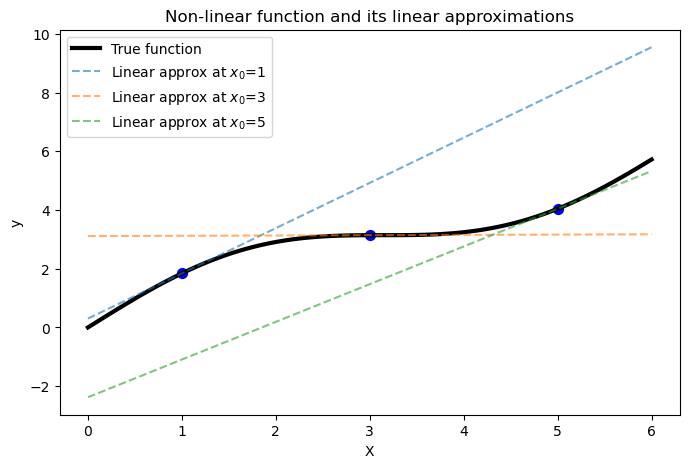

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the non-linear function
def true_function(x):
    return np.sin(x) + x

# Compute the first derivative of the true function
def true_function_derivative(x):
    return np.cos(x) + 1

# Points at which we will create linear approximations
x0_points = [1, 3, 5]

# Generate data for the non-linear function
X_nonlinear = np.linspace(0, 6, 100).reshape(-1, 1)
y_nonlinear = true_function(X_nonlinear)

plt.figure(figsize=(8, 5), dpi=100)

# Plot the true non-linear function
plt.plot(X_nonlinear, y_nonlinear, color='k', label='True function', lw=3)

# Plot linear approximations at different points
for x0 in x0_points:
    y0 = true_function(x0)
    slope = true_function_derivative(x0)
    y_approx = y0 + slope * (X_nonlinear - x0)
    
    plt.plot(X_nonlinear, y_approx, linestyle='--', label=f'Linear approx at $x_0$={x0}', alpha=0.6)
    plt.scatter([x0], [y0], color='blue', s=50)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-linear function and its linear approximations')
plt.legend()
plt.show()

The resulting plot shows how different linear functions can locally approximate the non-linear function reasonably well at different regions. However, we can see how the approximation is only valid in the vicinity of $x_0$.

## Linear Regression Framework

A linear regression model is a model used to analyze the relationship between a dependent variable (response) and one or more independent variables (predictors or covariates). In the case of one predictor, the linear regression model is referred to as a simple linear regression model, and it is given by

\begin{equation}
    y_i = \beta_0 + \beta_1 x_i + \epsilon_i
\end{equation}

 where $y_i$ is the $i$th observation of the response variable, $x$ is the $i$th observation of the predictor, $\beta_0$ is the intercept (the value of $y$ when $x$ is zero), $\beta_1$ is the regression coefficient (the expected change in $y$ per unit change in $x$), and $\epsilon$ represents the error term, accounting for the variability in $y$ that cannot be explained by the linear relationship with $x$. In most of the cases, we will assume $\epsilon$ to be normally distributed around zero with finite variance, $\epsilon \sim \mathcal{N}(0, \sigma^2)$. In the case of $p$ predictors and $n$ observations, the model is referred to as a multiple linear regression model, and we can express it in matrix notation, as in

\begin{equation}
    \mathbf{y}=\mathbf{X} \boldsymbol{\beta}+\boldsymbol{\epsilon}
\end{equation}

where
\begin{equation*}
    \mathbf{y}=\left[\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{array}\right], \quad \mathbf{X}=\left[\begin{array}{ccccc}
1 & x_{11} & x_{12} & \cdots & x_{1 p} \\
1 & x_{21} & x_{22} & \cdots & x_{2 p} \\
\vdots & \vdots & & \vdots \\
1 & x_{n 1} & x_{n 2} & \cdots & x_{n p}
\end{array}\right], \quad \boldsymbol{\beta}=\left[\begin{array}{c}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_p
\end{array}\right], \quad \text { and } \quad \boldsymbol{\epsilon}=\left[\begin{array}{c}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{array}\right]
\end{equation*}


$\mathbf{y}$ is a $n \times 1$ vector of response variables, $\mathbf{X}$ is a $n \times (p + 1)$ model matrix, $\boldsymbol{\beta}$ is a $(p + 1) \times 1$ vector of regression coefficients, and $\boldsymbol{\epsilon}$ is a $n \times 1$ vector representing the noise, with covariance matrix $\sigma^2 \mathbf{I}$. If the predictors and the response are centered (for example by subtracting the mean), the intercept term can be removed from the model. In that case, the size of the model matrix becomes $n \times p$, and $\boldsymbol{\beta}$ a $p \times 1$ vector. We will assume this is the case in the following sections. 

Linear regression models are based on several **key assumptions**:
- **Linearity**: the relationship between the predictors and the response is linear. This implies that a change in a predictor leads to a proportional change in the response. While real-life processes are rarely purely linear, we can often assume local linearity. This means that the linearity assumption holds within a reasonably limited range of the design space, recognizing that the relationship may not be linear over a wider range.
- **Independence**: observations are independent of each other. In other words, the observations do not influence each other. This assumption can be violated in many situations, particularly in time series data or spatial data where there might be autocorrelation (i.e., the value of a variable at one point in time or space is correlated with its values at other points).
- **Homoscedasticity**: the variance of the error terms (residuals) is constant across all levels of the independent variables. This condition, known as homoscedasticity, implies that the spread of the residuals should be roughly the same for all values of the predictors. If the variance of the residuals changes with the level of the predictors, the condition is known as heteroscedasticity, which can lead to inefficiencies and bias in the estimation of parameters.
 - **Normality of the error terms**: this assumption is particularly important for hypothesis testing and creating confidence intervals. It's crucial to note that this assumption pertains to the errors, not necessarily to the distributions of the predictors or the response variable. While linear regression can be robust to mild violations of this assumption, severe departures can affect the reliability of inference procedures


## Ordinary Least Squares Estimation
In regression analysis, the most common method to estimate the unknown model parameters $\mathbf{\beta}$ is ordinary least squares (OLS). The OLS method seeks to find the coefficients that minimize the sum of squares of the errors, $\epsilon_i$. Recall that a key assumption in linear regression models is that $\{\epsilon_i\}$ are uncorrelated random variables. We aim to find the vector of least squares estimators $\boldsymbol{{beta}}$ that minimizes

\begin{equation}
    \mathcal{L} = \sum_{i=1}^{n} \epsilon_i^2 = \boldsymbol{\epsilon}^\top\boldsymbol{\epsilon} 
\end{equation}

Because $\mathbf{y}=\mathbf{X} \boldsymbol{\beta}+\boldsymbol{\epsilon}$, we can express $\boldsymbol{\epsilon} = \mathbf{y} - \mathbf{X} \boldsymbol{\beta}$. So, we have

\begin{align}
    \mathcal{L} 
    &= (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \\
    &= (\mathbf{y}^\top - \boldsymbol{\beta}^\top\mathbf{X}^\top) (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \\
    &= \mathbf{y}^\top \mathbf{y} - \mathbf{y}^\top \mathbf{X} \boldsymbol{\beta} - \boldsymbol{\beta}^\top\mathbf{X}^\top \mathbf{y} + \boldsymbol{\beta}^\top\mathbf{X}^\top \mathbf{X}\boldsymbol{\beta} \\
    &= \mathbf{y}^\top \mathbf{y} - 2 \boldsymbol{\beta}^\top\mathbf{X}^\top \mathbf{y} + \boldsymbol{\beta}^\top\mathbf{X}^\top \mathbf{X}\boldsymbol{\beta}
\end{align}


 Note that $\mathbf{y}^\top \mathbf{X} \boldsymbol{\beta}$ is a scalar, because we have $(1 \times n) \times (n \times p) \times (p \times 1)$, resulting in a $1 \times 1$ matrix, which is a scalar. Similarly, $\boldsymbol{\beta}^\top\mathbf{X}^\top \mathbf{y}$, having dimensions $(1 \times p) \times (p \times n) \times (n \times 1)$, also results in a $1 \times 1$ matrix, or scalar. Moreover, due to the properties of transposition and the commutative property of scalar multiplication, these two expressions are not only scalars but also represent the same scalar value. Transposing a scalar does not affect its value, thus we have $(\mathbf{y}^\top \mathbf{X} \boldsymbol{\beta})^\top=\boldsymbol{\beta}^\top\mathbf{X}^\top \mathbf{y}$. Remind that, in matrix multiplication, if we transpose the product of two matrices, we reverse the order of multiplication and transpose each matrix: $(\mathbf{A}\mathbf{B})^\top=\mathbf{B}^\top \mathbf{A}^\top$.

Now, we need to get the derivative of $\mathcal{L}$ with respect to the parameter vector $\boldsymbol{\beta}$ and set it to zero. This way we will find the estimated coefficients $\mathbf{b}$.

\begin{equation}
    \frac{\partial \mathcal{L}}{\partial \boldsymbol{\beta}} \Bigr|_{\widehat{\boldsymbol{\beta}}} = - 2 \mathbf{X}^\top \mathbf{y} + 2 \mathbf{X}^\top \mathbf{X}\widehat{\boldsymbol{\beta}} = \mathbf{0}
\end{equation}

which simplifies to 

\begin{equation}
    \mathbf{X}^\top \mathbf{X}\widehat{\boldsymbol{\beta}} = \mathbf{X}^\top \mathbf{y}
\end{equation}

Multiplying both sides by the inverse of $\mathbf{X}^\top \mathbf{X}$ we get the OLS estimate

\begin{equation}
    \widehat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}
\end{equation}

The matrix $\mathbf{X}^\top \mathbf{X}$ is sometimes referred to as the Gram matrix or the moment matrix, because it contains the ``second moments'' (i.e., variances and covariances) of the independent variables. The diagonal elements are the sums of squares of each predictor, and the off-diagonal elements represent the sums of cross-products (or covariances) between different predictors. The fitted regression model is then given by

\begin{equation}
    \widehat{\mathbf{y}} = \mathbf{X} \widehat{\boldsymbol{\beta}} = \mathbf{X}(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y} = \mathbf{H}\mathbf{y}
\end{equation}


where the matrix $\mathbf{H}$ is referred to as the hat matrix or influence matrix. We can see how the fitted values at the data points used to estimate the model are linear combinations of the observed responses, with weights given by the hat matrix. Geometrically, this means that we find the fitted values by taking the vector of observed responses $\mathbf{y}$ and projecting it onto a certain plane, which is entirely defined by the values in $\mathbf{X}$. If we repeat our experiment (e.g., survey, observation) many times at the same locations $\mathbf{X}$, we get different responses $\mathbf{y}$ every time. But $\mathbf{H}$ does not change. The properties of the fitted values are thus largely determined by the properties of $\mathbf{H}$.


## Expected Value and Variance of the Least Square Estimators

Because we know that $\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0}, \sigma^2\mathbf{I}_n)$, we can say that $\mathbf{y} \sim \mathcal{N}(\mathbf{X} \boldsymbol{\beta}, \sigma^2\mathbf{I}_n)$. Since $\boldsymbol{\epsilon}$ follows a multivariate normal distribution, any linear combination of $\boldsymbol{\epsilon}$ is also multivariate normally distributed, including $\mathbf{y}$. The expectation of $\mathbf{y}$ is $\mathbf{X} \boldsymbol{\beta}$ because $\boldsymbol{\epsilon}$ has expectation zero. Similarly, since $\widehat{\boldsymbol{\beta}}$ is a linear transformation of $\mathbf{y}$, it is also normally distributed.

Assuming the model is correct, we can first evaluate the bias of the OLS estimator by looking at the expected value of $\widehat{\boldsymbol{\beta}}$, which is given by

\begin{align}
    \mathbb{E}[\widehat{\boldsymbol{\beta}}] &= \mathbb{E}[(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}] \\
    &= \mathbb{E}[(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top (\mathbf{X} \boldsymbol{\beta}+\boldsymbol{\epsilon})] \\
    &= \mathbb{E}[(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{X} \boldsymbol{\beta}+(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top\boldsymbol{\epsilon})] \\
    &= \mathbb{E}[\boldsymbol{\beta} + (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \boldsymbol{\epsilon}] \\
    &= \boldsymbol{\beta}
\end{align}

Thus, $\widehat{\boldsymbol{\beta}}$ is an unbiased estimator of $\boldsymbol{\beta}$ if the model is correct. In the derivation of the expected value we used that $\mathbb{E}[\boldsymbol{\epsilon}]=\mathbf{0}$ and that $(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{X}=\mathbf{I}$, and of course the expected value of the constant $\boldsymbol{\beta}$ is $\boldsymbol{\beta}$ itself.

The variance property of $\widehat{\boldsymbol{\beta}}$ is expressed by the covariance matrix 

\begin{equation}
    \operatorname{Cov}[\widehat{\boldsymbol{\beta}}] = \mathbb{E}[(\widehat{\boldsymbol{\beta}}-\mathbb{E}[\widehat{\boldsymbol{\beta}}])(\widehat{\boldsymbol{\beta}}-\mathbb{E}[\widehat{\boldsymbol{\beta}}])^\top]
\end{equation}

which is a $p \times p$ symmetric matrix whose $j$th diagonal element is the variance of $\widehat{\boldsymbol{\beta}}_j$ and whose ($ij$)th off-diagonal element is the covariance between $\widehat{\beta}_i$ and $\widehat{\beta}_j$. The
covariance matrix of $\widehat{\boldsymbol{\beta}}$ is found by applying a variance operator to $\widehat{\boldsymbol{\beta}}$

\begin{equation}
    \operatorname{Cov}[\widehat{\boldsymbol{\beta}}] = \operatorname{Var}[\widehat{\boldsymbol{\beta}}] = \operatorname{Var}[(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}]
\end{equation}

Now let us remind that, in general, if a vector $\mathbf{v}$ has covariance matrix $\mathbf{C}$ we have that

\begin{equation}
    \operatorname{Cov}[\mathbf{A}\mathbf{v}] = \mathbf{A} \mathbf{C} \mathbf{A}^\top
\end{equation}

where $\mathbf{A}$ is a linear transformation. Thus, knowing that $\mathbf{y}$ has a covariance equal to $\sigma^2\mathbf{I}_n$, we get that

\begin{align}
    \operatorname{Var}[\widehat{\boldsymbol{\beta}}] &= \operatorname{Var}[(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}]\\ &= (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top(\sigma^2\mathbf{I}_n)((\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top)^\top \\
    &= \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{I}_n((\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top)^\top \\
    &= \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{X}(\mathbf{X}^\top \mathbf{X})^{-1} \\
    &= \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}
\end{align}

Thus, we have that our estimator is normally distributed around the true parameter vector as

\begin{equation}
    \widehat{\boldsymbol{\beta}}|\mathbf{X} \sim \mathcal{N}(\boldsymbol{\beta}, \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1})
\end{equation}


### First-Order Model Example

Let's create an example to show how we can manually implement OLS to fit a multiple linear regression model. First, we generate 1000 data points with two predictors $\mathbf{x}_1$ and $\mathbf{x}_2$, and $y$ is calculated as

$$\mathbf{y} = 3 + 4 \mathbf{x}_1 + 5 \mathbf{x}_2 + \text{noise}$$

In [2]:
# Generate synthetic data with two predictors
np.random.seed(0)
X1 = 2 * np.random.rand(1000, 1)
X2 = 3 * np.random.rand(1000, 1)
y = 3 + 4 * X1 + 5 * X2 + np.random.randn(1000, 1)

To estimate the regression coefficients, we first create the data matrix $\mathbf{X}$, including a column of ones to account for the intercept term, and the two features $\mathbf{x}_1$ and $\mathbf{x}_2$.

In [3]:
# Combine the predictors into one matrix and adding a column of ones for the intercept
X = np.c_[np.ones((1000, 1)), X1, X2]

Then, we can manually implement OLS and find the best-fitting parameters $\widehat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}$.

In [4]:
# Manually implement the OLS method
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Print the estimated coefficients
print(f"Intercept: {beta[0][0]:.3f}")
print(f"Coefficient for X1: {beta[1][0]:.3f}")
print(f"Coefficient for X2: {beta[2][0]:.3f}")

Intercept: 3.079
Coefficient for X1: 3.963
Coefficient for X2: 4.956
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


We can see how the estimated coefficients are very close to the real ones. Now, we can visualise the fitted surface by creating a grid of values for $\mathbf{x}_1$ and $\mathbf{x}_2$ and computing the predicted $\mathbf{y}$ values over this grid to generate the regression surface.

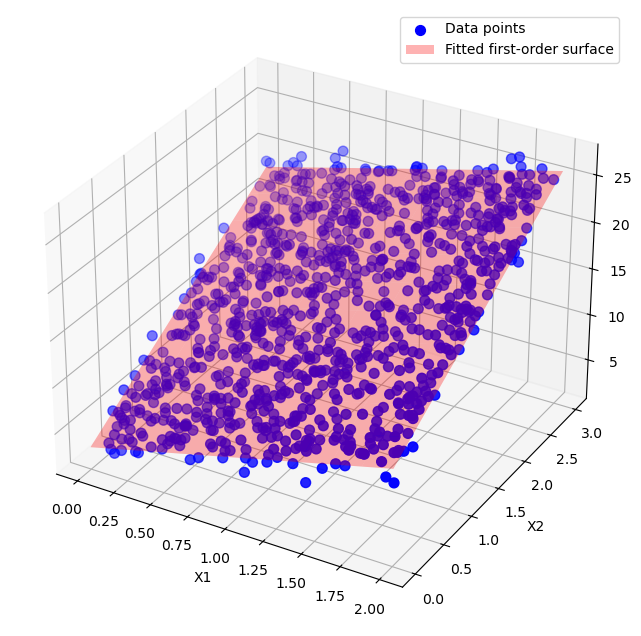

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Predictions for the surface plot
x1_surf, x2_surf = np.meshgrid(np.linspace(0, 2, 1000), np.linspace(0, 3, 1000))
y_surf = beta[0] + beta[1] * x1_surf + beta[2] * x2_surf

# Plotting the data and the regression surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='blue', s=50, label='Data points')
ax.plot_surface(x1_surf, x2_surf, y_surf, color='red', alpha=0.3, rstride=100, cstride=100, label='Fitted first-order surface')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.legend()
plt.show()

## Second-Order Model Example

A second-order model is a model that extends the linear regression model to capture non-linear relationships by including quadratic terms. The model can be written as:

$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i
$$

where:
- $y_i$ is the $i$-th observation of the response variable,
- $x_i$ is the $i$-th observation of the predictor,
- $\beta_0$ is the intercept,
- $\beta_1$ is the linear coefficient,
- $\beta_2$ is the quadratic coefficient,
- $\epsilon_i$ represents the error term.

In matrix notation, for $n$ observations and one predictor, the model can be expressed as:

$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

where:

$$
\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}, \quad \mathbf{X} = \begin{bmatrix} 1 & x_{11} & x_{11}^2 \\ 1 & x_{21} & x_{21}^2 \\ \vdots & \vdots & \vdots \\ 1 & x_{n1} & x_{n1}^2 \end{bmatrix}, \quad \boldsymbol{\beta} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \end{bmatrix}, \quad \boldsymbol{\epsilon} = \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{bmatrix}
$$

Then, once we have augmented the matrix $\mathbf{X}$ to include quadratic terms, we can find the regression coefficients using the OLS estimate, as we did in the first-order case. It is easy to see how this is also a valid approach when we have more than one predictor and multiple quadratic terms.

Let's now generate some data from the following second-order model:

$$\mathbf{y} = 2 + 3\mathbf{x} + 5 \mathbf{x}^2 + \text{noise}$$

In [6]:
# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1) - 1
y = 2 + 3 * X + 5 * X**2 + np.random.randn(100, 1)  # Quadratic function with noise

As we did before, we create the data matrix $\mathbf{X}$ by stacking a column of ones, and two more columns: one for the original feature $\mathbf{x}$, and one for its squared version $\mathbf{x}^2$.

In [7]:
# Prepare the design matrix for second-order polynomial regression
X_poly = np.c_[np.ones((100, 1)), X, X**2]

Then, we can find the estimated coefficients using the OLS formula.

In [8]:
# Manually implement the OLS method
beta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

# Print the estimated coefficients
print(f"Intercept: {beta[0][0]:.3f}")
print(f"Coefficient for x: {beta[1][0]:.3f}")
print(f"Coefficient for x^2: {beta[2][0]:.3f}")

Intercept: 2.341
Coefficient for x: 2.937
Coefficient for x^2: 4.548
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Finally, we cna plot the fitted curve.

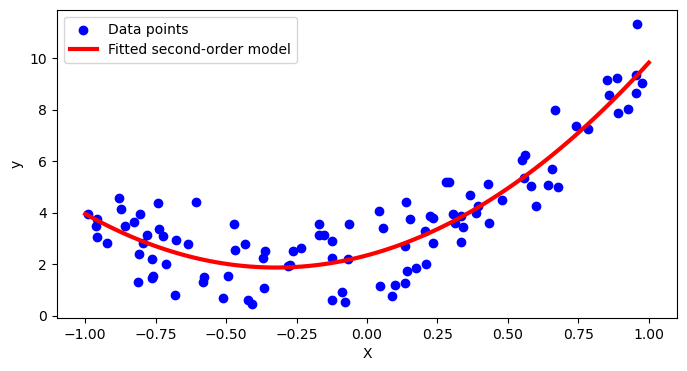

In [9]:
# Predictions for plotting
X_new = np.linspace(-1, 1, 100).reshape(100, 1)
X_new_poly = np.c_[np.ones((100, 1)), X_new, X_new**2]
y_pred = X_new_poly.dot(beta)

# Plotting the data and the polynomial regression model
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_pred, color='red', linewidth=3, label='Fitted second-order model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Hypothesis Testing for Regression Coefficients

### Starting with an Example
In linear regression, hypothesis testing is used to determine whether the relationship between the independent variables (predictors) and the dependent variable (response) is statistically significant. The null hypothesis ($H_0$) typically states that there is no relationship between the predictor and the response, i.e., the coefficient for the predictor is zero. The alternative hypothesis ($H_1$) states that there is a significant relationship, i.e., the coefficient is not zero.


Let's generate a synthetic dataset with multiple predictors, fit a multiple linear regression model, and perform hypothesis testing on the coefficients to determine their significance. We will generate a dataset with multiple predictors and some extra predictors that are not significant to test the hypothesis testing process.

**Step-by-step procedure**:
1. Generate synthetic data with multiple predictors. The true coefficients are `[5, 3, -2, 1, 0, 0]`, where some predictors have zero coefficients to simulate non-significant predictors. The response variable is generated as $y = 5 + 3X_1 - 2X_2 + X_3 + \text{noise}$, where the noise is normally distributed with mean 0 and standard deviation 1.
2. Fit a multiple linear regression model using `statsmodels`.
3. Interpret the regression summary table, including the p-values.
4. Explain the formulas for p-value computation.

In [10]:
import pandas as pd
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(0)
n_samples = 1000

# True coefficients
beta = np.array([5, 3, -2, 1, 0, 0])  # Including some zero coefficients for non-significant predictors

# Generate random predictors
X1 = 2 * np.random.rand(n_samples, 1)
X2 = 3 * np.random.rand(n_samples, 1)
X3 = np.random.rand(n_samples, 1) - 1
X4 = np.random.rand(n_samples, 1) * 2 - 1
X5 = np.random.rand(n_samples, 1)
X6 = np.random.rand(n_samples, 1)

# Combine predictors into a matrix
X = np.c_[X1, X2, X3, X4, X5, X6]

# Generate response variable with some noise
y = 5 + 3*X1 + (-2)*X2 + 1*X3 + np.random.randn(n_samples, 1)

# Convert to pandas DataFrame for ease of use with statsmodels
df = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
df['y'] = y

# Add a constant term (intercept) to the predictors
X = sm.add_constant(df.drop(columns='y'))

# Fit the model using statsmodels
model = sm.OLS(df['y'], X)
results = model.fit()

# Print the summary of the regression model
print(results.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1013.
Date:                Thu, 19 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:28:36   Log-Likelihood:                -1415.6
No. Observations:                1000   AIC:                             2845.
Df Residuals:                     993   BIC:                             2879.
Df Model:                           6                                         
Covariance Type:            nonrobust  

The `summary()` function from `statsmodels` provides detailed information about the regression model, including coefficients, standard errors, t-values, and p-values for each predictor.

**How to read this table**:

1. `Dep. Variable: y` This is the response variable that the model is trying to predict.

2. `R-squared: 0.860` indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

3. `Adj. R-squared: 0.859` adjusts for the number of predictors in the model.

4. `F-statistic: 1013.` tests the overall significance of the model, a very small p-value (`Prob (F-statistic): 0.00`) indicates that at least one predictor is significantly related to the response variable.

5. `Log-Likelihood: -1415.6` can be used in model comparison. Higher values (closer to zero) indicate a better fit.

6. `No. Observations: 1000` is total number of data points used in the regression.

7. `AIC: 2845.` and `BIC: 2879.` are information criteria used for model comparison. Lower values indicate a better fit.

8. `Df Residuals: 993` and `Df Model: 6` are the degrees of freedom for the residuals and the model, respectively.

9. The **coefficients table** is the main part of the output and it includes:
    - `coef` the coefficient estimates for the intercept term and for each predictor.
    - `std err` measure the variability of the coefficient estimates. Smaller values indicate more precise estimates.
    - `t` the t-values computed as the ratio of the coefficient to its standard error: $t = \frac{\hat{\beta}}{SE(\hat{\beta})}$.
    - `P>|t|` the p-value which indicates the probability of observing a t-value at least as extreme as the computed one if the null hypothesis ($\beta = 0$) is true. A small p-value (typically < 0.05) suggests that the coefficient is significantly different from zero.
    - `[0.025 0.975]` the confidence intervals provide a range of values within which the true coefficient is likely to fall with 95% confidence.
10. The **diagnostic tests** part include tests that check for various assumptions and properties of the residuals.
    - **Omnibus**: Tests for skewness and kurtosis. A small value indicates normality.
    - **Durbin-Watson**: Tests for autocorrelation in residuals. Values around 2 indicate no autocorrelation.
    - **Jarque-Bera**: Another test for normality. A small value indicates normality

### Some Background about Hypothesis Testing and Confidence Intervals

#### Test for Overall Significance of the Model
The test for significance of regression is a test to determine if there is a linear relationship between the response variable $y$ and a subset of the regressor variables $x_1, x_2,\ldots, x_p$. The appropriate hypotheses are

\begin{align}
    H_0 &: \beta_1 = \beta_2 = \ldots = \beta_p = 0 \\
    H_1 &: \beta_j \neq 0 \quad \text{for at least one } j
\end{align}

This test procedure is called an analysis of variance (ANOVA) because it is based on a decomposition of the total variability in the response variable $y$. The total variability in the response variable is measured by the total sum of squares ($\operatorname{SS}_T$), calculated as

\begin{equation}
    \operatorname{SS}_T = \sum_{i=1}^{n} (y_i - \bar{y})^2
\end{equation}

which is used as a measure of overall variability in the data. Intuitively, this is reasonable because if we were to divide $\operatorname{SS}_T$ by the appropriate number of degrees of freedom, we would have the sample variance of the $y$s. This $\operatorname{SS}_T$  is partitioned into

\begin{equation}
    \operatorname{SS}_T = \operatorname{SS}_M + \operatorname{SS}_E
\end{equation}

where $\operatorname{SS}_M$ is the sum of squares due to the regression model($\operatorname{SS}_M$), measuring the explained variation in $ y $, calculated as $ \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2 $; and $\operatorname{SS}_E$ is the sum of squares due to error ($\operatorname{SS}_E$), measuring the unexplained variation in $ y $, calculated as $ \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $. $\operatorname{SS}_M$ measures the explained variability in the dependent variable due to the independent variables in the regression model. Under the null hypothesis (which typically states that all regression coefficients except the intercept are zero), $\operatorname{SS}_M$ captures variability that is purely due to chance. To reject the null hypotheses and say that a significant part of the variability is explained by the model (thus justifying the existence of at least one coefficient), we would like $\operatorname{SS}_M$ to be significantly larger than $\operatorname{SS}_R$. More formally, we use the test statistic is given by

\begin{equation}
    F_0 = \frac{\operatorname{SS}_M/p}{\operatorname{SS}_E/(n-p-1)} = \frac{\operatorname{MS}_M}{\operatorname{MS}_E}
\end{equation}

Since the residuals are assumed to be normally distributed, $\operatorname{SS}_M$ and $\operatorname{SS}_E$ follow a chi-squared distribution, and their ratio follows an F-distribution. This is why the critical value for the test is given $F_{\alpha, p, n-p-1}$, where $\alpha$ is the confidence level. We reject the null hypothesis $H_0$ if $F_0 > F_{\alpha, p, n-p-1}$. \textbf{ANOVA one factor at the time:} If we have five factors (A, B, C, D, E) and we want to find which factors are significant for a given significance level $\alpha$, we compare $MS_i/MS_E$ for $i=A, \ldots, E$ where the $MS_E$ is usually the pure error that comes from replications (or the whole error?).

#### Tests on Individual Coefficients
Adding a variable to the regression model always causes the sum of squares for the regression model ($\operatorname{SS}_M$) to increase and the error sum of squares to decrease. The hypotheses for testing the significance of any individual regression coefficient $\beta_j$ are

\begin{align}
    H_0 &: \beta_j = 0 \\
    H_1 &: \beta_j \neq 0
\end{align}

If $H_0$ is not rejected, then this indicates that $x_j$ can be deleted from the model. However, note that this is truly a partial or marginal test, because the regression coefficients depend on all the other regressor variables $x_i$, with $i \neq j$, that are in the model. Because we know that

\begin{equation}
    \widehat{\boldsymbol{\beta}} \sim \mathcal{N}(\boldsymbol{\beta}, \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1})
\end{equation}

For the $i$th coefficient, we do have that

\begin{equation}
    \widehat{\beta}_i \sim \mathcal{N}(\beta_i, \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{ii})
\end{equation}

where $\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{ii}$ is the diagonal element of the covariance matrix $\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}$ corresponding to $b_j$. The test statistic is given by

\begin{equation}
    t_0 = \frac{\widehat{\beta}_i}{\sqrt{\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{ii}}}
\end{equation}

The denominator $\sqrt{\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{ii}}$ is also called standard error of the regression coefficients $\widehat{\beta}_i$, so we can also write it as

\begin{equation}
    t_0 = \frac{\widehat{\beta}_i}{\text{se}(\widehat{\beta}_i)}
\end{equation}

The distribution is a Student's t distribution because the coefficients itself is normally distributed, while the estimated variance has a Chi-square distribution. So the ratio between a normal and the squared root of a Chi-square follows a t distribution. 


#### Confidence Intervals on Individual Regression Coefficients

A confidence interval, from the frequentist standpoint, is an interval estimate of a parameter $\beta_j$ that, if the same data collection and analysis procedure were repeated many times, would contain the true parameter value a certain percentage (e.g., 95%) of the time $\beta_j$. This is because in frequentist statistics, parameters are considered fixed but unknown quantities. The data are random, which means the calculated confidence interval varies from sample to sample. Saying a 95\% confidence interval for a parameter is $[a, b]$ means that if we were to repeat the study many times, 95% of such calculated intervals would contain the true parameter value. It does not mean there is a 95% probability that the true parameter lies within that specific interval for the observed data. Conversely, Bayesian methods treat parameters as random variables and provide a probability distribution (the posterior distribution) that quantifies uncertainty about parameter values given the observed data. The uncertainty about a parameter is directly quantified by its posterior distribution. A 95% credible interval from Bayesian analysis means there is a 95% probability that the parameter lies within this interval, given the data and the prior information. Frequentist confidence intervals do not allow for probabilistic statements about the parameter being within the interval for a given dataset. In contrast, Bayesian credible intervals provide a probability that the parameter lies within the interval, given the data and prior.

So far, we have demonstrated that $\widehat{\boldsymbol{\beta}} \sim \mathcal{N}(\boldsymbol{\beta}, \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1})$. This also implied that the marginal distribution for any regression coefficient is $\widehat{\beta}_j \sim \mathcal{N}(\beta_j, \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{jj})$. Then, we can say that

\begin{equation}
    \frac{\widehat{\beta}_j - \beta_j}{\sqrt{\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{jj}}} \sim \mathcal{N}(0, 1) 
\end{equation}

Since we do not know $\sigma^2$, we used its estimate $\widehat{\sigma}^2$ obtained through the $\operatorname{MS}_E$, which has a $\chi^2$ distribution with $n-p$ degrees of freedom. Thus, we have 

\begin{equation}
    \frac{\widehat{\beta}_j - \beta_j}{\sqrt{\widehat{\sigma}^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{jj}}} \sim t_{n-p}
\end{equation}

We can then define a 100$(1-\alpha)\%$ confidence interval for the regression coefficient $\beta_j$, $j = 0,1,\ldots, p$, as

\begin{equation}
    \widehat{\beta}_j - t_{\alpha/2, n-p} \sqrt{\hat{\sigma}^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{jj}} \leq \beta_j \leq \widehat{\beta}_j + t_{\alpha/2, n-p} \sqrt{\hat{\sigma}^2 (\mathbf{X}^\top \mathbf{X})^{-1}_{jj}}
\end{equation}

where $t_{\alpha/2, n-p}$ is the critical value from the t-distribution for $\alpha/2$ and $n-p$ degrees of freedom. This can also be written in terms of the standard error of the estimated coefficient $b_j$ as

\begin{equation}
    \widehat{\beta}_j - t_{\alpha/2, n-p} \text{se}(\widehat{\beta}_j) \leq \beta_j \leq \widehat{\beta}_j + t_{\alpha/2, n-p} \text{se}(\widehat{\beta}_j)
\end{equation}

#### Confidence Interval on the Mean Response and Prediction Variance

We can define a confidence interval on the mean response at a particular point $\mathbf{x}_0$. The fitted value at this particular point is

\begin{equation}
    \widehat{y}_0 = \mathbf{x}_0^\top \widehat{\boldsymbol{\beta}}
\end{equation}

Because we have $\mathbf{y} \sim \mathcal{N}(\mathbf{X} \boldsymbol{\beta}, \sigma^2\mathbf{I}_n)$, suggesting how $\mathbb{E}[y|\mathbf{X}] = \mathbf{X} \boldsymbol{\beta}$, we also have that $\mathbb{E}[y|\mathbf{x}_0] = \mathbf{x}_0^\top \boldsymbol{\beta}$. Then, we have

\begin{equation}
     \mathbb{E}[\widehat{y}_0] = \mathbb{E}[\mathbf{x}_0^\top \widehat{\boldsymbol{\beta}}] = \mathbf{x}_0^\top \boldsymbol{\beta}
\end{equation}

because $\mathbb{E}[\widehat{\boldsymbol{\beta}}] = \boldsymbol{\beta}$. Thus, $\widehat{y}_0$ is an unbiased estimator of $\mathbb{E}[y|\mathbf{x}_0]$. Since $\widehat{y}_0$ is a linear combination of $\widehat{\boldsymbol{\beta}}$, which has a variance of $\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}$, the variance of $\widehat{y}_0$ is given by

\begin{equation}
    \operatorname{Var}[\widehat{y}_0] = \operatorname{Var}\left[\mathbf{x}_0^\top \widehat{\boldsymbol{\beta}}\right] = \mathbf{x}_0^\top(\sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1})\mathbf{x}_0 = \sigma^2\mathbf{x}_0^\top(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{x}_0
\end{equation}

Then, we can define the 100(1-$\alpha$)% confidence interval on the mean response at point $\mathbf{x}_0$ as

\begin{equation}
    \widehat{y}_0 - t_{\alpha/2, n-p} \sqrt{\sigma^2\mathbf{x}_0^\top(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{x}_0} \leq \mathbb{E}[y|\mathbf{x}_0] \leq \widehat{y}_0 + t_{\alpha/2, n-p} \sqrt{\sigma^2\mathbf{x}_0^\top(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{x}_0}
\end{equation}

In general, we can define the **prediction variance (PV)** of the fitted value at location $\mathbf{x}_0$ as

\begin{equation}
    \operatorname{PV} = \operatorname{Var}[\widehat{y}_0] = \sigma^2\mathbf{x}_0^\top(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{x}_0
\end{equation}

Then, the **unscaled prediction variance (UPV)** is given by 

\begin{equation}
    \operatorname{UPV} = \frac{\operatorname{Var}[\widehat{y}_0]}{\sigma^2} = \mathbf{x}_0^\top(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{x}_0
\end{equation}

The main benefit of the UPV is that it can be used during the design selection phase. The division
by $\sigma^2$ means that \underline{UPV is a function of only the design matrix} and does not require data to have been collected. UPV provides a way to quantify the precision of the predictions made by a regression model at specific points. It tells us how much the predicted value at a certain point $\mathbf{x}_0$ is expected to vary, due to the variability in the estimated regression coefficients, but without considering the inherent variability of the response itself. The key intuition is that since $\widehat{\boldsymbol{\beta}}$ carries variance, any prediction made using these estimates also inherits variance (i.e., uncertainty propagation?). UPV connects parameter estimation to prediction variance by translating the uncertainty in the model's coefficients into the uncertainty of the model's predictions. If we have already collected data, we can try to estimate $\sigma^2$ using the $\operatorname{MS}_E$. Then, we can define the **estimated prediction variance (EPV)** as

\begin{equation}
    \operatorname{EPV} = \widehat{\sigma}^2\mathbf{x}_0^\top(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{x}_0
\end{equation}

## Regularization Methods

Regularization techniques are fundamental to the field of machine learning and statistics, primarily used to prevent overfitting, improve model generalization, and handle multicollinearity among predictors. We will now briefly introduce three primary methods for regularization.

### Lasso Regression (L1 Penalty)
The least absolute shrinkage and selection operator (lasso) regression introduces a penalty term equal to the absolute value of the magnitude of coefficients to the loss function. The objective function of Lasso regression is given by:

\begin{equation}
    \text{minimize} \; \left\{ \frac{1}{2n} \sum_{i=1}^{n} (y_i - x_i^\top \beta)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right\},
\end{equation}

where $\lambda$ is a regularization parameter that controls the strength of the penalty.

**Key aspects**:

- Promotes sparsity in the model coefficients, effectively performing feature selection.
- Particularly useful when dealing with high-dimensional data or when feature selection is desired.
- Can result in models that are easier to interpret due to fewer predictors.


### Ridge Regression (L2 Penalty)
Ridge regression adds a penalty equal to the square of the magnitude of coefficients to the loss function. The formulation of Ridge regression is as follows:

\begin{equation}
    \text{minimize} \; \left\{ \frac{1}{2n} \sum_{i=1}^{n} (y_i - x_i^\top \beta)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right\},
\end{equation}

where $\lambda$ is the regularization parameter.

**Key aspects**:

- Reduces model complexity by shrinking coefficients, but does not necessarily reduce them to zero.
- Particularly beneficial in situations with multicollinearity among predictors.
- Helps to stabilize the coefficient estimates and improve model generalization.


### Elastic Net (combination of L1 and L2 penalties)
Elastic Net combines the penalties of Lasso and Ridge, incorporating both the L1 and L2 penalty terms. The objective function for Elastic Net is:

\begin{equation}
    \text{minimize} \; \left\{ \frac{1}{2n} \sum_{i=1}^{n} (y_i - x_i^\top \beta)^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \frac{\lambda_2}{2} \sum_{j=1}^{p} \beta_j^2 \right\},
\end{equation}

where $\lambda_1$ and $\lambda_2$ are parameters that control the strength of the L1 and L2 penalties, respectively.

**Key aspects**:

- Combines the feature selection properties of Lasso with the ridge regression's ability to handle multicollinearity.
- Encourages a grouping effect, where correlated predictors either enter or leave the model together.
- Offers a balance between Lasso and Ridge regression by allowing for control over both penalties, making it versatile for various scenarios.
- Useful in high-dimensional data scenarios where Lasso might suffer due to high correlations among predictors.


Each of these regularization methods has its unique strengths and applications, and the choice among them should be guided by the specific characteristics of the data and the modeling objectives at hand.